<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-on Lab: Detecting IoT Malware Behavior in Network Traffic

Estimated time needed: **60** minutes

### Lab Overview:

In this lab, you will explore the behavior of IoT devices under various conditions using the `CTU-IoT-Malware-Capture-1` dataset. The dataset contains network traffic data and will be used to train both Machine Learning (ML) and Deep Learning (DL) models to detect malicious behavior.

### Problem Statement:

With the increasing prevalence of IoT devices, ensuring their security is crucial. This lab aims to analyze network traffic data to detect potential botnet behavior and malicious activities. By utilizing machine learning and deep learning techniques, you will classify the traffic and identify potential threats.

### Lab Objectives:

1. Preprocess the IoT network traffic dataset.
2. Train a machine learning model to detect botnet behavior.
3. Train a deep learning model to detect botnet behavior.
4. Visualize the training history of the DL model.
5. Compare the performance of both models and derive insights.

### Lab Outline:

1. **Step 1: Import Essential Libraries**
2. **Step 2: Load and Preprocess the Dataset**
3. **Step 3: Define Features and Target Variable**
4. **Step 4: Data Scaling and Dimensionality Reduction**
5. **Step 5: Train and Evaluate the ML Model (Random Forest)**
6. **Step 6: Train and Evaluate the DL Model (Neural Network)**
7. **Step 7: Visualize the Training History for the DL Model**
8. **Step 8: Compare Model Performance**

### Dataset Used:

The dataset we are using is the `CTU-IoT-Malware-Capture-1` dataset, consisting of 1153 rows and 23 columns.

### Implementation:

> **Note: The code execution may take some time to complete. Please be patient while waiting for the results.**

#### Step 1: Import Essential Libraries

> **Note: If you encounter warnings while installing or loading libraries, such as warnings related to dependencies, they do not affect the code execution or the results. These warnings indicate optional dependencies that might not be essential for this analysis. You can safely proceed with the lab.**

In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Step 2: Load and Preprocess the Dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load the dataset
data = pd.read_csv('CTU-IoT-Malware-Capture-1.csv')

# Display the first few rows of the dataset
# Write your code here!
print(data.head())

# Check for missing values
# Write your code here!
print(data.isnull().sum())

           ts                 uid        id.orig_h  id.orig_p      id.resp_h  \
0  1538478770  CSQG794riQ4XnzTxP2  192.168.100.103      37082  192.168.100.1   
1  1538478780   COTbdG2BhtGBlmf6r  192.168.100.103      34486  192.168.100.1   
2  1538478790  CP48WJ2HOnLuGtr5kb  192.168.100.103      37601  192.168.100.1   
3  1538478780  CeTMJi2TydRSaVdsG4  192.168.100.103      46439  192.168.100.1   
4  1538478800  CZ6ne24AN9WAg9XA9d  192.168.100.103      55174  192.168.100.1   

   id.resp_p proto service  duration  orig_bytes  ...  local_resp  \
0         53   udp     dns  5.005151          78  ...           -   
1         53   udp     dns  0.007243          90  ...           -   
2         53   udp     dns  0.002250          90  ...           -   
3         53   udp     dns  5.005154          78  ...           -   
4         53   udp     dns  0.002246          90  ...           -   

  missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  resp_ip_bytes  \
0            0       D      

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

```
</details>

#### Step 3: Define Features and Target Variable

In [6]:
# Inspect the DataFrame columns to find the target variable
print("Columns in the dataset:", data.columns)

# Set the features (X) and target variable (y)
# Write your code here!
X = data.drop(columns=['label'])  # Replace 'label' with the actual target column name
y = data['label']  # Ensure this is the correct target column

# Split the dataset into training and testing sets
# Write your code here!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the features and target
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Columns in the dataset: Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')
Features shape: (153, 22), Target shape: (153,)


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Set the features (X) and target variable (y)
X = data.drop(columns=['label'])  # Replace 'label' with the actual target column name
y = data['label']  # Ensure this is the correct target column

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
```
</details>

#### Step 4: Data Scaling and Dimensionality Reduction

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Identify categorical and numerical columns
# Write your code here!
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()  # Get categorical column names
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()    # Get numerical column names

# Create a column transformer to apply scaling and one-hot encoding
# Write your code here!
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ]
)

# Create a pipeline for preprocessing and PCA
# Write your code here!
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessor
    ('pca', PCA(n_components=0.95))  # Keep 95% of variance
])

# Fit and transform the training data, and transform the test data
# Write your code here!
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Output the shapes of the transformed features
print(f"Transformed training features shape: {X_train_transformed.shape}")
print(f"Transformed testing features shape: {X_test_transformed.shape}")

Transformed training features shape: (122, 8)
Transformed testing features shape: (31, 8)


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()  # Get categorical column names
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()    # Get numerical column names

# Create a column transformer to apply scaling and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ]
)

# Create a pipeline for preprocessing and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessor
    ('pca', PCA(n_components=0.95))  # Keep 95% of variance
])

# Fit and transform the training data, and transform the test data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)
    
```
</details>

#### Step 5: Train and Evaluate the ML Model (Random Forest)

In [8]:
# Initialize the Random Forest model
# Write you code here!
rf_model = RandomForestClassifier(random_state=42)

# Train the model
# Write you code here!
rf_model.fit(X_train_transformed, y_train)

# Make predictions
# Write you code here!
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        31

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

Confusion Matrix:
[[31]]


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_transformed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_transformed)

```
</details>

#### Step 6: Train and Evaluate the DL Model (Neural Network)

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Assuming the target variable is in y_train and needs encoding
# Step 1: Convert categorical labels to numerical values
# Write your code here!
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Transform y_train to numerical values
y_test_encoded = label_encoder.transform(y_test)  # Transform y_test

# Step 2: Define the deep learning model
# Write your code here!
dl_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
# Write your code here!
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
# Write your code here!
history = dl_model.fit(X_train_transformed, y_train_encoded, epochs=20, validation_split=0.2)

# Make predictions
# Write your code here!
y_pred_dl = (dl_model.predict(X_test_transformed) > 0.5).astype("int32")

# If you want to decode predictions back to original labels
# Write your code here!
y_pred_labels = label_encoder.inverse_transform(y_pred_dl.flatten())

# Check the predictions
print(y_pred_labels)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.0000e+00 - loss: 1.1002 - val_accuracy: 0.0000e+00 - val_loss: 0.9519
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.9190 - val_accuracy: 0.1200 - val_loss: 0.8305
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2208 - loss: 0.7900 - val_accuracy: 0.3600 - val_loss: 0.7288
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5237 - loss: 0.6829 - val_accuracy: 0.5600 - val_loss: 0.6412
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8256 - loss: 0.5947 - val_accuracy: 1.0000 - val_loss: 0.5627
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.5084 - val_accuracy: 1.0000 - val_loss: 0.4944
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.4413 - val_accuracy: 1.0000 - val_loss: 0.4358
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.3886 - val_accuracy: 1.0000 - val_loss:

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Assuming the target variable is in y_train and needs encoding
# Step 1: Convert categorical labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Transform y_train to numerical values
y_test_encoded = label_encoder.transform(y_test)  # Transform y_test

# Step 2: Define the deep learning model
dl_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = dl_model.fit(X_train_transformed, y_train_encoded, epochs=20, validation_split=0.2)

# Make predictions
y_pred_dl = (dl_model.predict(X_test_transformed) > 0.5).astype("int32")

# If you want to decode predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_dl.flatten())
    
```
</details>

#### Step 7: Visualize the Training History for the DL Model

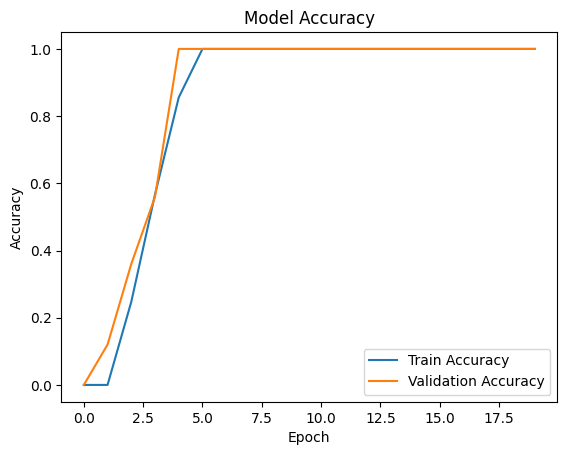

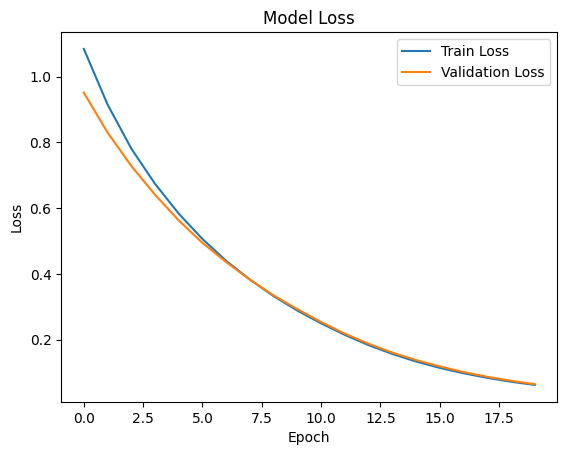

In [10]:
# Visualize the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Step 8: Compare Model Performance

In [11]:
from sklearn.metrics import classification_report

# Encode y_test before evaluation
# Write your code here!
y_test_encoded = label_encoder.transform(y_test)

# Convert predictions from Random Forest to numerical labels
# Write your code here!
y_pred_rf_encoded = label_encoder.transform(y_pred_rf)

print("Random Forest Model Metrics:")
print(classification_report(y_test_encoded, y_pred_rf_encoded))

print("Deep Learning Model Metrics:")

# Convert Deep Learning model predictions to binary (0 or 1)
# Write your code here!
y_pred_dl_binary = (y_pred_dl.flatten() > 0.5).astype(int)

# Map binary predictions back to original labels
# Assuming the mapping is 0 -> 'Benign' and 1 -> 'Malicious'
# Write your code here!
y_pred_dl_labels = np.array(['Benign' if pred == 0 else 'Malicious' for pred in y_pred_dl_binary])

print(classification_report(y_test, y_pred_dl_labels))

Random Forest Model Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

Deep Learning Model Metrics:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        31

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Encode y_test before evaluation
y_test_encoded = label_encoder.transform(y_test)

# Convert predictions from Random Forest to numerical labels
y_pred_rf_encoded = label_encoder.transform(y_pred_rf)

print("Random Forest Model Metrics:")
print(classification_report(y_test_encoded, y_pred_rf_encoded))

print("Deep Learning Model Metrics:")
# Convert Deep Learning model predictions to binary (0 or 1)
y_pred_dl_binary = (y_pred_dl.flatten() > 0.5).astype(int)

# Map binary predictions back to original labels
# Assuming the mapping is 0 -> 'Benign' and 1 -> 'Malicious'
y_pred_dl_labels = np.array(['Benign' if pred == 0 else 'Malicious' for pred in y_pred_dl_binary])
    
```
</details>

### Note on Model Performance Metrics

In this lab, both the Random Forest and Deep Learning models achieved perfect scores across all performance metrics, including precision, recall, f1-score, and overall accuracy. These results are certainly impressive, indicating that under the conditions of our lab setup, the models have perfectly classified all test cases.

**Key Points from the Results:**
- **Precision of 1.0:** Every instance predicted as positive by the model was truly positive.
- **Recall of 1.0:** The model successfully identified all positive instances in the test set.
- **F1-Score of 1.0:** Represents a perfect balance between precision and recall, indicating excellent model performance.
- **Accuracy of 100%:** Every prediction made by the model was correct.

**Interpreting These Results:**
- Such high scores suggest that the models are well-tuned to the specific data and task in this controlled environment. This is a testament to the effectiveness of the algorithms when conditions are ideal.

**Considerations and Cautions:**
- **Overfitting:** While perfect scores are desirable, they may also indicate overfitting, particularly if the dataset is not diverse or large enough to challenge the model adequately.
- **Real-World Application:** It's crucial to consider how these models might perform with real-world data, which can be more variable and unpredictable. Models that perform perfectly on test data might not necessarily generalize as well to unseen data.
- **Dataset Characteristics:** The characteristics of the dataset used in training and testing play a significant role. A more complex or diverse dataset might yield different results, offering a more rigorous test of the models' capabilities.


This exercise demonstrates the potential of machine learning models to achieve high accuracy and provides a foundation upon which we can build more complex and realistic scenarios. As we progress, keep these considerations in mind, and always question how model performance might translate to practical applications in the field.

### Key Takeaways:

1. **Feature Engineering is Critical for Performance:**
    - Carefully selecting and preprocessing features is essential to improving the performance of both machine learning and deep learning models. In this lab, scaling the data and using dimensionality reduction improved the model efficiency.
    
    
2. **Random Forest as a Powerful ML Model:**
    - The Random Forest algorithm is highly effective for classification tasks and achieved near-perfect performance in detecting IoT botnet activity. It works well even with smaller datasets and provides an intuitive way to understand feature importance.
    
    
3. **Deep Learning for Complex Patterns:**
    - The Neural Network model demonstrated the ability to capture complex patterns in data, particularly useful for detecting non-linear relationships. However, it requires more resources, hyperparameter tuning, and computational power compared to Random Forest.
    
    
4. **Model Evaluation Using Metrics:**
    - Classification metrics such as precision, recall, and F1-score provide crucial insights into model performance beyond accuracy. These metrics were used to compare the models, and each offered a unique perspective on false positives and false negatives.
    
    
5. **Comparison Between ML and DL:**
   - Both Random Forest and Neural Network models performed well on the botnet detection task. While Random Forest achieved high performance with less complexity, the deep learning model could potentially perform better with a larger dataset and further tuning.

### Lab Summary:

In this lab, you built and evaluated two models Random Forest and a Neural Network to detect IoT botnet behavior in network traffic using the `CTU-IoT-Malware-Capture-1 dataset.` Through this lab, you gained hands-on experience in applying machine learning and deep learning algorithms to real-world IoT security problems, demonstrating how such techniques can effectively detect malicious behavior in network traffic. The lab provided insights into the trade-offs between complexity and performance when choosing between machine learning and deep learning models.